# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import whale_navs.csv from the resources folder to be transformed into a dataframe to be later utilized in the analysis
whale_navs_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    infer_datetime_format=True,
    parse_dates=True
)

whale_navs_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Calculate the daily returns and store in a variable, dropping NaN values, and display top 5 rows of the dataframe
daily_returns = whale_navs_df.pct_change().dropna()

daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Soros Fund Management v S&P 500 Daily Returns'}, xlabel='date'>

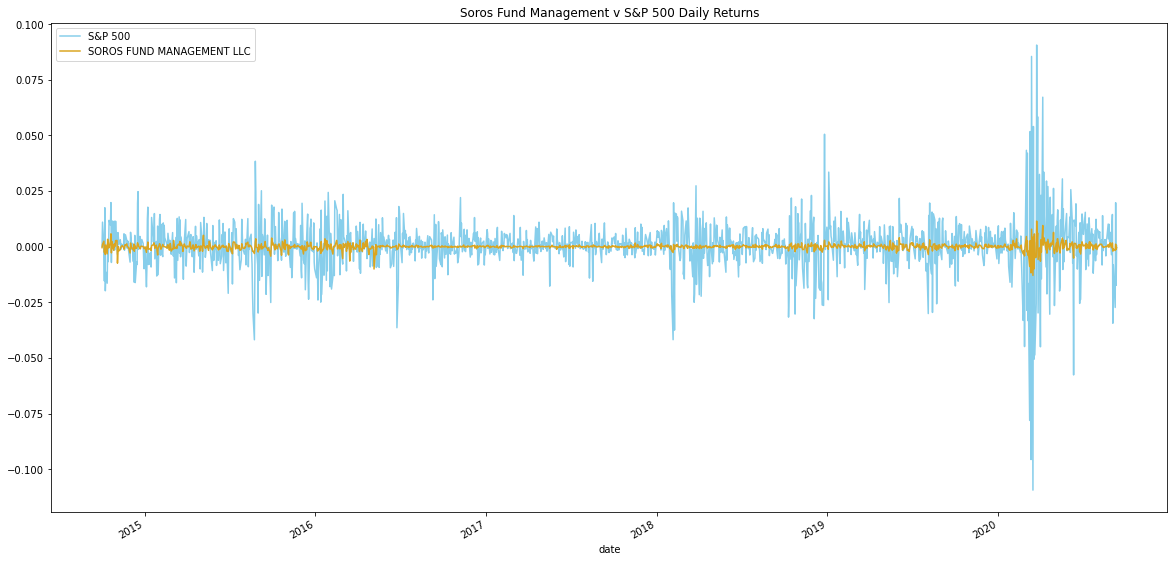

In [4]:
# Plot the S&P 500 daily returns
ax = daily_returns["S&P 500"].plot(figsize=(20,10), title="Soros Fund Management v S&P 500 Daily Returns", color='skyblue', legend=True)

# Plot the Soros Fund Management daily returns on the same axis
daily_returns["SOROS FUND MANAGEMENT LLC"].plot(ax=ax, color='goldenrod', legend=True)

<AxesSubplot:title={'center':'Paulson & Co v S&P 500 Daily Returns'}, xlabel='date'>

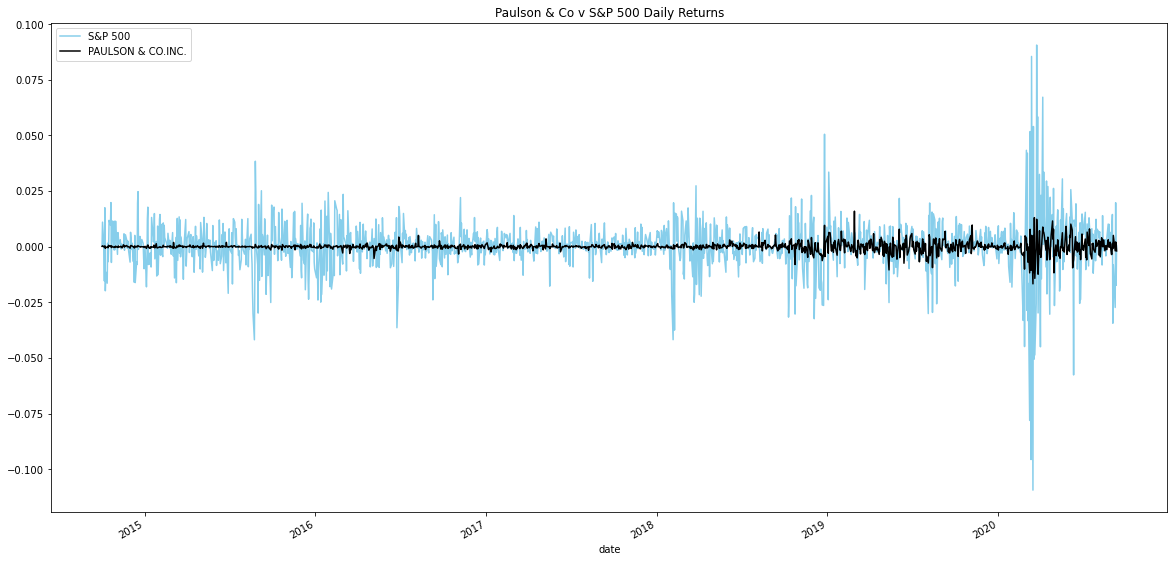

In [5]:
# Plot the S&P 500 daily returns
ax = daily_returns["S&P 500"].plot(figsize=(20,10), title="Paulson & Co v S&P 500 Daily Returns", color='skyblue', legend=True)

# Plot the Paulson & Co. Inc. daily returns on the same axis
daily_returns["PAULSON & CO.INC."].plot(ax=ax, color='black', legend=True)

<AxesSubplot:title={'center':'Tiger Global Management v S&P 500 Daily Returns'}, xlabel='date'>

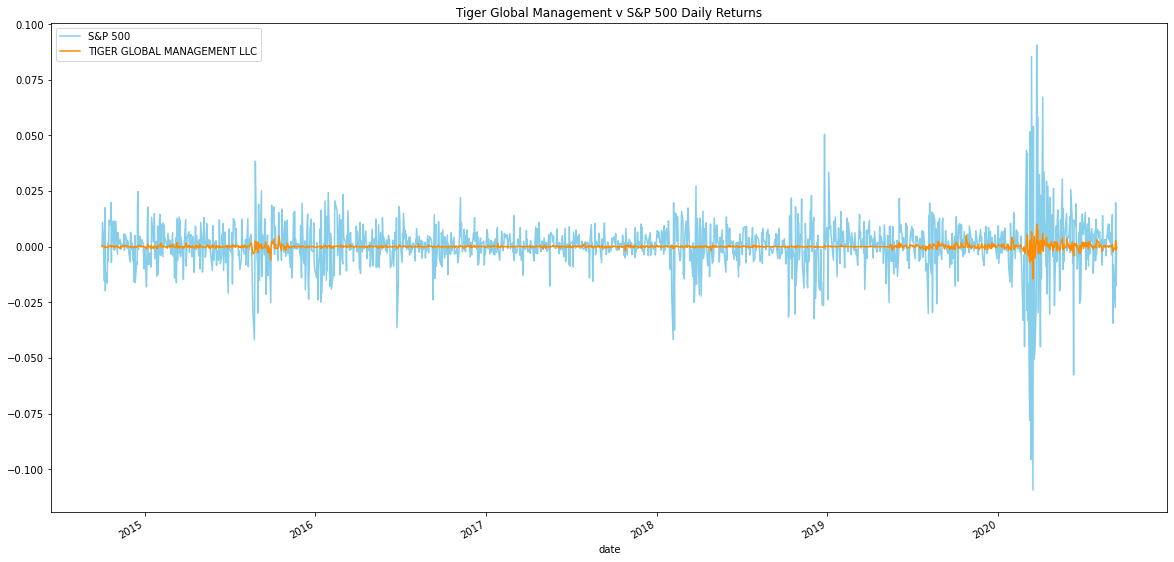

In [6]:
# Plot the S&P 500 daily returns
ax = daily_returns["S&P 500"].plot(figsize=(20,10), title="Tiger Global Management v S&P 500 Daily Returns", color='skyblue', legend=True)

# Plot the Tiger Global daily returns on the same axis
daily_returns["TIGER GLOBAL MANAGEMENT LLC"].plot(ax=ax, color='darkorange', legend=True)

<AxesSubplot:title={'center':'Berkshire Hathaway v S&P 500 Daily Returns'}, xlabel='date'>

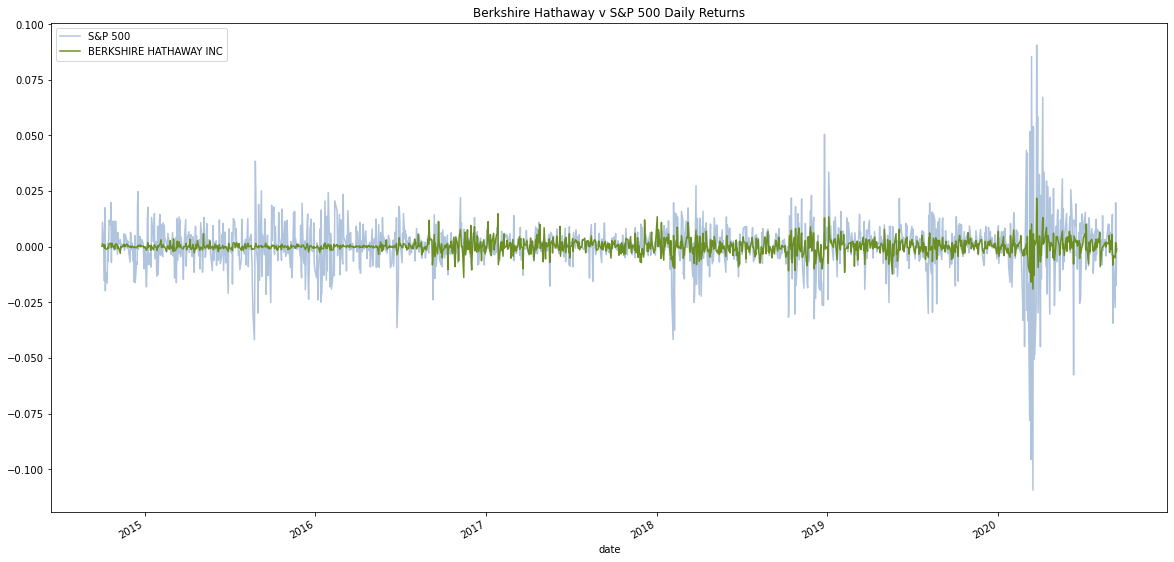

In [7]:
# Plot the S&P 500 daily returns
ax = daily_returns["S&P 500"].plot(figsize=(20,10), title="Berkshire Hathaway v S&P 500 Daily Returns", color='lightsteelblue', legend=True)

# Plot the Berkshire Hathaway Inc. daily returns on the same axis
daily_returns["BERKSHIRE HATHAWAY INC"].plot(ax=ax, color ='olivedrab', legend=True)

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [31]:
# Calculate the cumulative returns for the 4 funds and the S&P 500 and display the tail to confirm
cumulative_returns = (1 + daily_returns).cumprod()

cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:xlabel='date'>

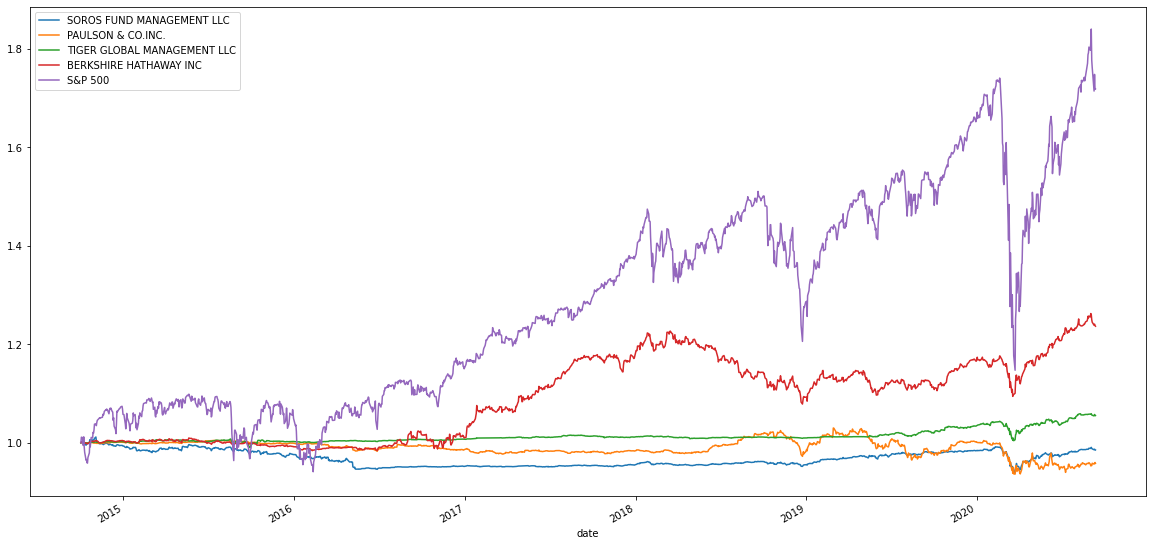

In [32]:
# Plot the cumulative returns for all four funds and the S&P 500
cumulative_returns.plot(figsize=(20,10))


#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** No they all underperform the S&P 500

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Whale Fund and S&P Daily Return Volatility'}>

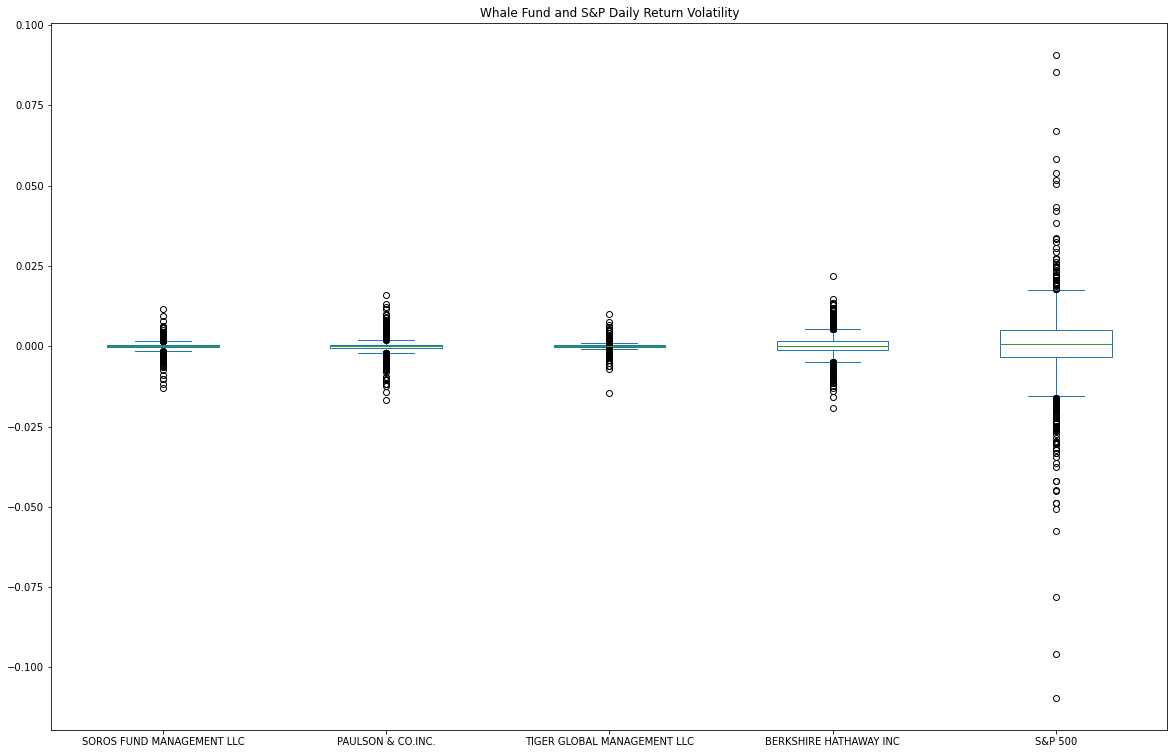

In [33]:
# Visualize the volatility of the four 'whale funds' and the S&p 500 with a box plot
daily_returns.plot(kind='box', figsize=(20,13), title='Whale Fund and S&P Daily Return Volatility')


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [34]:
# Create a dataframe for the four whale funds and display the first five rowsto confirm
fund_only_returns_df = daily_returns.drop(['S&P 500'], axis=1)

fund_only_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Whale Fund Return Volatility'}>

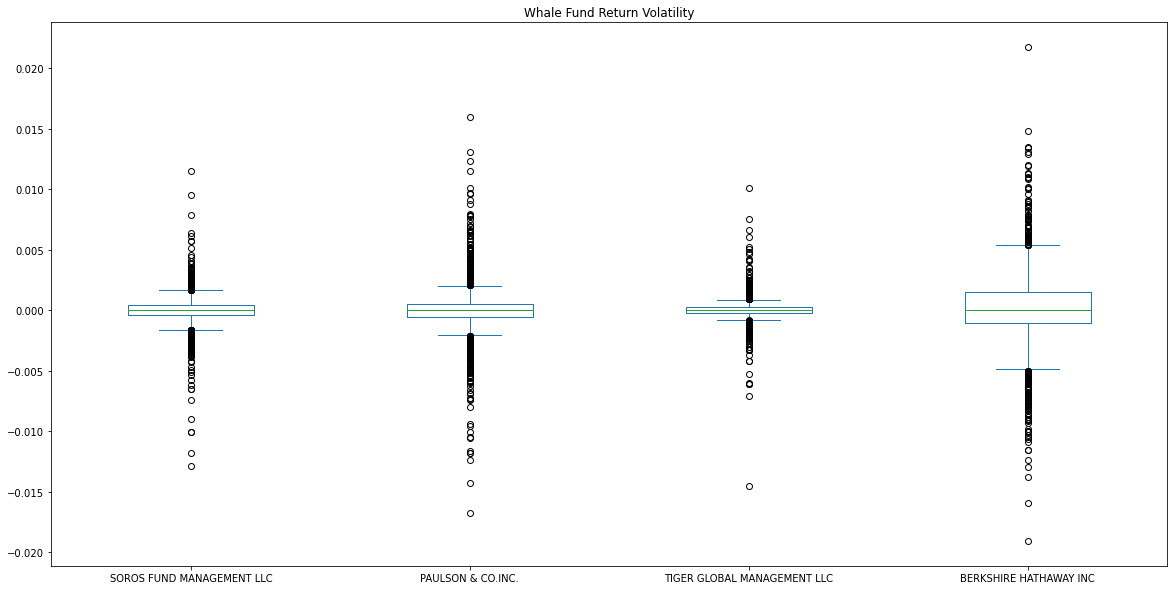

In [35]:
# Visualize the volatility of the four 'whale funds' with a box plot
fund_only_returns_df.plot(kind='box', figsize=(20,10), title='Whale Fund Return Volatility')

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** The most volatile is Berkshire Hathaway, as it has the longest whiskers and the largest spread with respect to outlying data points, and the least volatile is Tiger Global Management LLC.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [13]:
# Calculate the standard deviation of the daily returns for the four whale funds and the S&P 500
daily_return_sd = daily_returns.std()

# Sort the values
daily_return_sd.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [36]:
# Calculate and sort the annualized standard deviation of the four whale funds and the S&P 500
annualized_daily_return_sd = daily_return_sd * np.sqrt(252)

# Sort the values
annualized_daily_return_sd.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Std. Deviation of Returns - Whale Fund vs S&P 500'}, xlabel='date'>

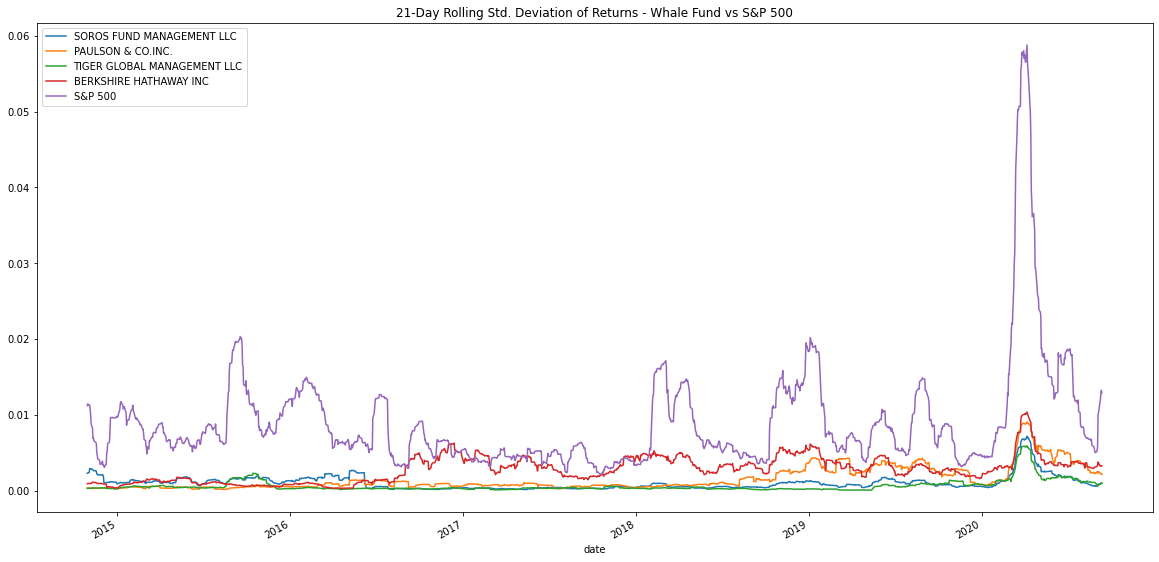

In [15]:
# Calculate the rolling, 21-day standard deviation of daily returns for the four whale funds and the S&P 500
rolling_returns_sd = daily_returns.rolling(window=21).std()

# Visualize the values
rolling_returns_sd.plot(figsize=(20,10), title='21-Day Rolling Std. Deviation of Returns - Whale Fund vs S&P 500')

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Std. Deviation of Returns - Whale Funds'}, xlabel='date'>

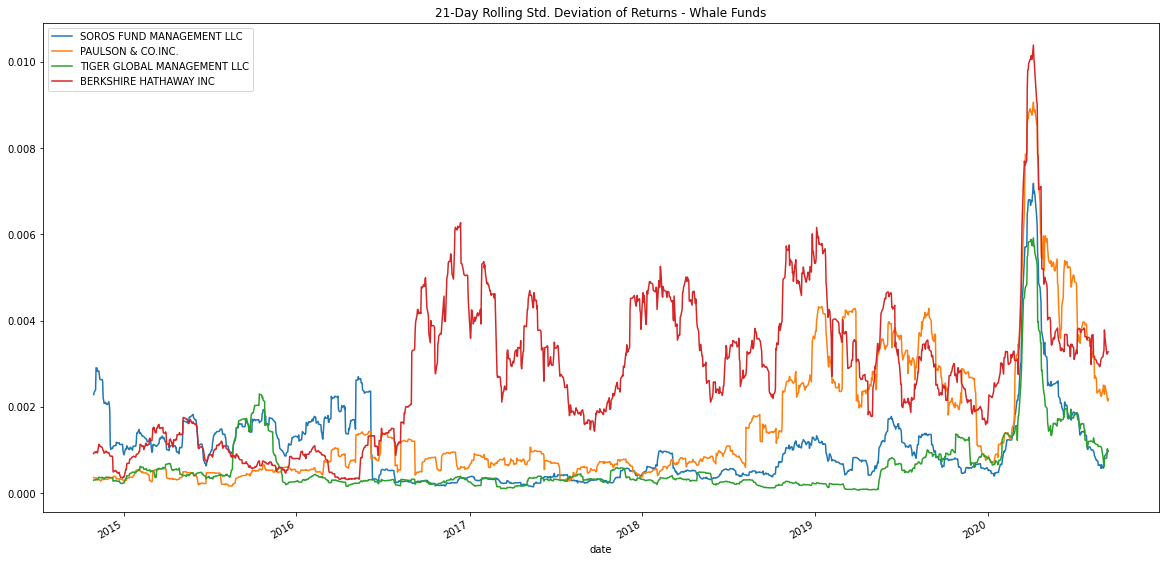

In [16]:
# Calculate the rolling, 21-day standard deviation of daily returns for the four whale funds
funds_only_rolling_returns_sd = fund_only_returns_df.rolling(window=21).std()

# Visualize the values
funds_only_rolling_returns_sd.plot(figsize=(20,10), title='21-Day Rolling Std. Deviation of Returns - Whale Funds')

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** None of the fund portfolios pose more risk than the S&P 500. Tey are all less risky.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** Between 2015 and late 2016, the risk of each portfolio does not fluctuate with the risk 


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** Berkshire Hathaway poses the most risk. Pauslon and Co becomes far more risky over time, at certain points surpassing the level of risk of Berkshire Hathaway, but BRK overall is the most risky.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [37]:
# Set the number of trading days in the year
trading_days = 252

# Calculate the annual average return data for the for fund portfolios and the S&P 500
average_rate_of_return = daily_returns.mean() * trading_days

# Dispay the sorted values
average_rate_of_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [38]:
# Calculate the annulaized standard deviation of returns for the four whale funds and the S&P 500
annualized_std_dev_returns = daily_returns.std() * trading_days

# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
sharpe_ratio = average_rate_of_return / annualized_std_dev_returns

# Dispay the sorted values
sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.011969
SOROS FUND MANAGEMENT LLC     -0.006444
TIGER GLOBAL MANAGEMENT LLC    0.036474
S&P 500                        0.037142
BERKSHIRE HATHAWAY INC         0.045199
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Whale Fund v S&P 500 Sharpe Ratios'}>

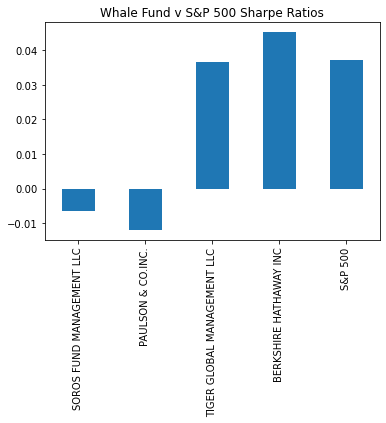

In [39]:
# Plot the Sharpe ratios of the four whale funds and the S&P 500
sharpe_ratio.plot(kind='bar', title='Whale Fund v S&P 500 Sharpe Ratios')

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Best: Berkshire Hathaway (highest Sharpe Ratio) , Worst: Paulson & Co (most-negative Sharpe Ratio)

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [40]:
# Determine the daily returns of the S&P 500
daily_returns_spx = daily_returns.drop(["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC"], axis=1)

# Calculate the 60-day rolling variance of the S&P 500 and display the last 5 rows 
rolling_return_variance_spx = daily_returns_spx.rolling(window=60).var()
rolling_return_variance_spx.tail()

,S&P 500
date,
2020-09-04,0.000103
2020-09-08,0.000116
2020-09-09,0.000120
2020-09-10,0.000121
2020-09-11,0.000120


#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

 ## BERKSHIRE HATHAWAY

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [41]:
# Calculate the 60-day rolling covariance of Berkshire Hathaway and the S&P 500
brk_spx_covar = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_returns["S&P 500"])

# Transform the 60-day rolling covariance into a dataframe and display
brk_spx_covar_df = pd.DataFrame(brk_spx_covar, columns=["Covariance"])
brk_spx_covar_df.tail()

,Covariance
date,
2020-09-04,0.000021
2020-09-08,0.000023
2020-09-09,0.000024
2020-09-10,0.000024
2020-09-11,0.000024


##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [42]:
# Calculate the 60-day rolling Beta of Berkshire Hathaway against the S&P 500 and display
brk_spx_beta = brk_spx_covar_df["Covariance"] / rolling_return_variance_spx["S&P 500"]
brk_spx_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Calculate the average of the 60-day rolling beta and display
brk_spx_average_beta = brk_spx_beta.mean()
brk_spx_average_beta

0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-Day Rolling Berkshire Portfolio Beta'}, xlabel='date'>

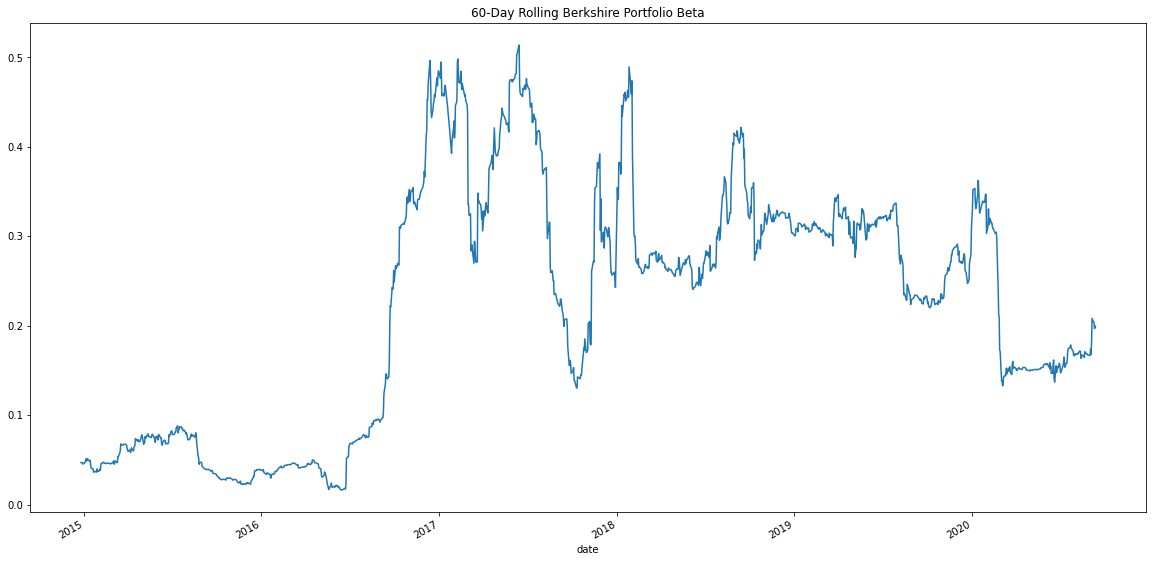

In [24]:
# Plot the 60-day rolling beta of Berkshire Hathaway
brk_spx_beta.plot(figsize=(20,10), title='60-Day Rolling Berkshire Portfolio Beta')

## TIGER GLOBAL

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [25]:
# Calculate the 60-day rolling covariance of Tiger Global and the S&P 500
tiger_spx_covar = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns["S&P 500"])

# Transform the 60-day rolling covariance into a dataframe and display
tiger_spx_covar_df = pd.DataFrame(tiger_spx_covar, columns=["Covariance"])
tiger_spx_covar_df.tail()

,Covariance
date,
2020-09-04,0.000008
2020-09-08,0.000009
2020-09-09,0.000010
2020-09-10,0.000010
2020-09-11,0.000010


##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [26]:
# Calculate the 60-day rolling Beta of Tiger Global against the S&P 500 and display
tiger_spx_beta = tiger_spx_covar_df["Covariance"] / rolling_return_variance_spx["S&P 500"]
tiger_spx_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [27]:
# Calculate the average of the 60-day rolling beta and display
tiger_spx_average_beta = tiger_spx_beta.mean()
tiger_spx_average_beta

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-Day Rolling Tiger Portfolio Beta'}, xlabel='date'>

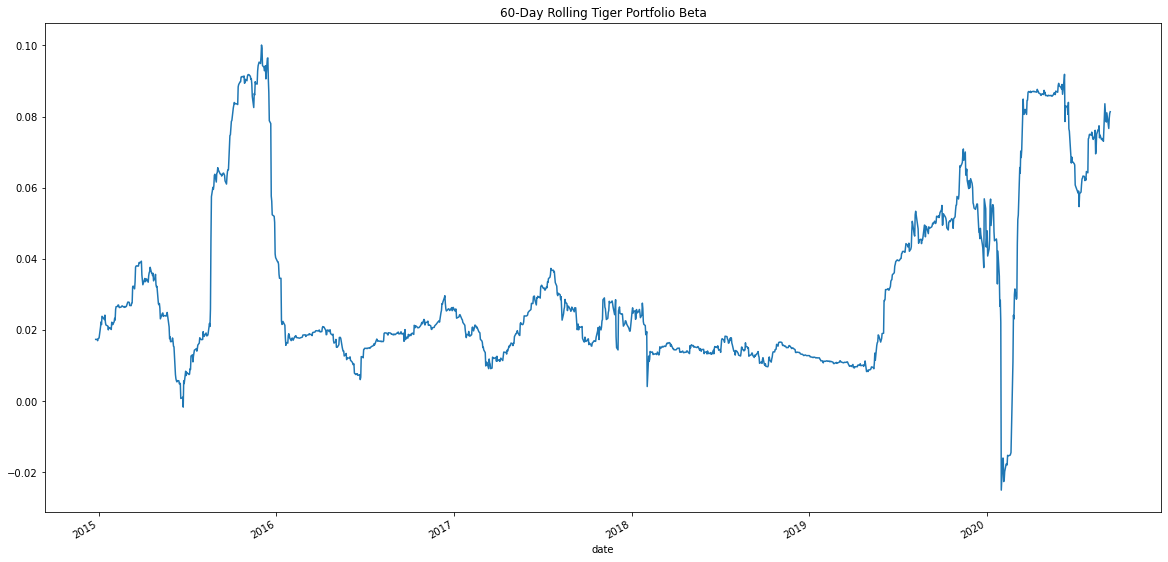

In [43]:
# Plot the 60-day rolling beta of Tiger Global
tiger_spx_beta.plot(figsize=(20,10),title='60-Day Rolling Tiger Portfolio Beta')


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** The Berkshire Hathaway portfolio seems to be more sensitive to movements in the S&P 500 as it's beta mean is far closer to 1 than that of Tiger. Also, the BRK portfolio beta stays above .1 consistently, while the Tiger beta stays well below that mark.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** I would recommend including Berkshire Hathaway as it has a higher beta than Tiger Global. While this means it is more closely correlated to the market and therefore could argue that one would be better off simply investing in the market, the risk-reward profile is more enticing. Tiger is less volatile but therefore also is less likely to return highr multiples than BRK.

---